### leaning and Exploratory Analysis 



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

#setting viewing option
#d.set_option('display.height',2260668)
#pd.set_option('display.max_columns',145)

# Load the dataset
Loan=pd.read_csv(r'C:\Users\kkbal\OneDrive\Desktop\practise\data set\loan.csv')
Loan.head()
np.shape(Loan)


In [2]:
Loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,url,dti,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,0.0,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,0.0,2.258957e+06,...,10613.0,10613.000000,10613.0,10613.000000,8426.000000,10613.000000,10613.000000,33056.000000,33056.000000,33056.000000
mean,NaN,NaN,1.504693e+04,1.504166e+04,1.502344e+04,1.309291e+01,4.458076e+02,7.799243e+04,NaN,1.882420e+01,...,3.0,155.006696,3.0,13.686422,454.840802,11628.036442,193.606331,5030.606922,47.775600,13.148596
std,NaN,NaN,9.190245e+03,9.188413e+03,9.192332e+03,4.832114e+00,2.671737e+02,1.126962e+05,NaN,1.418333e+01,...,0.0,129.113137,0.0,9.728138,375.830737,7615.161123,198.694368,3692.027842,7.336379,8.192319
min,NaN,NaN,5.000000e+02,5.000000e+02,0.000000e+00,5.310000e+00,4.930000e+00,0.000000e+00,NaN,-1.000000e+00,...,3.0,0.640000,3.0,0.000000,1.920000,55.730000,0.010000,44.210000,0.200000,0.000000
25%,NaN,NaN,8.000000e+03,8.000000e+03,8.000000e+03,9.490000e+00,2.516500e+02,4.600000e+04,NaN,1.189000e+01,...,3.0,59.370000,3.0,5.000000,174.967500,5628.730000,43.780000,2227.000000,45.000000,6.000000
50%,NaN,NaN,1.290000e+04,1.287500e+04,1.280000e+04,1.262000e+01,3.779900e+02,6.500000e+04,NaN,1.784000e+01,...,3.0,119.040000,3.0,15.000000,352.605000,10044.220000,132.890000,4172.855000,45.000000,14.000000
75%,NaN,NaN,2.000000e+04,2.000000e+04,2.000000e+04,1.599000e+01,5.933200e+02,9.300000e+04,NaN,2.449000e+01,...,3.0,213.260000,3.0,22.000000,622.792500,16114.940000,284.180000,6870.782500,50.000000,18.000000
max,NaN,NaN,4.000000e+04,4.000000e+04,4.000000e+04,3.099000e+01,1.719830e+03,1.100000e+08,NaN,9.990000e+02,...,3.0,943.940000,3.0,37.000000,2680.890000,40306.410000,1407.860000,33601.000000,521.350000,181.000000


In [2]:
#pd.set_option('display.max_rows',2260668)
Loan.info()
Loan.isnull().any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260668 entries, 0 to 2260667
Columns: 145 entries, id to settlement_term
dtypes: float64(105), int64(4), object(36)
memory usage: 2.4+ GB


id                        True
member_id                 True
loan_amnt                False
funded_amnt              False
funded_amnt_inv          False
                         ...  
settlement_status         True
settlement_date           True
settlement_amount         True
settlement_percentage     True
settlement_term           True
Length: 145, dtype: bool

In [3]:
Loan_type=Loan.dtypes.value_counts()
Loan_type

#plot.figure(figsize=(15,5))
#sns.barplot(x=Loan_type.index,y=Loan_type.values)


float64    105
object      36
int64        4
dtype: int64

In [4]:
Loan_new=Loan.drop(['id','member_id','url','policy_code','emp_title'],axis=1,inplace=False)

In [5]:
# seperating numbers and columns
num_col=Loan_new.select_dtypes(include=('int64','float64'))
object_col=Loan_new.select_dtypes(include=('object'))
num_col
object_col


,term,grade,sub_grade,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,desc,...,hardship_status,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_loan_status,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date
0,36 months,C,C1,10+ years,RENT,Not Verified,Dec-2018,Current,n,NaN,...,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN
1,60 months,D,D2,10+ years,MORTGAGE,Source Verified,Dec-2018,Current,n,NaN,...,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN
2,36 months,D,D1,6 years,MORTGAGE,Source Verified,Dec-2018,Current,n,NaN,...,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN
3,36 months,D,D2,10+ years,MORTGAGE,Source Verified,Dec-2018,Current,n,NaN,...,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN
4,60 months,C,C4,10+ years,MORTGAGE,Not Verified,Dec-2018,Current,n,NaN,...,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260663,60 months,C,C3,10+ years,MORTGAGE,Not Verified,Oct-2017,Current,n,NaN,...,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN
2260664,60 months,E,E4,< 1 year,MORTGAGE,Not Verified,Oct-2017,Fully Paid,n,NaN,...,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN
2260665,36 months,B,B5,10+ years,OWN,Source Verified,Oct-2017,Current,n,NaN,...,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN
2260666,60 months,D,D5,NaN,RENT,Not Verified,Oct-2017,Current,n,NaN,...,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN


In [6]:
num_col.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,2.258957e+06,2.260639e+06,2.260638e+06,1.102166e+06,...,10613.0,10613.000000,10613.0,10613.000000,8426.000000,10613.000000,10613.000000,33056.000000,33056.000000,33056.000000
mean,1.504693e+04,1.504166e+04,1.502344e+04,1.309291e+01,4.458076e+02,7.799243e+04,1.882420e+01,3.068792e-01,5.768354e-01,3.454092e+01,...,3.0,155.006696,3.0,13.686422,454.840802,11628.036442,193.606331,5030.606922,47.775600,13.148596
std,9.190245e+03,9.188413e+03,9.192332e+03,4.832114e+00,2.671737e+02,1.126962e+05,1.418333e+01,8.672303e-01,8.859632e-01,2.190047e+01,...,0.0,129.113137,0.0,9.728138,375.830737,7615.161123,198.694368,3692.027842,7.336379,8.192319
min,5.000000e+02,5.000000e+02,0.000000e+00,5.310000e+00,4.930000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,3.0,0.640000,3.0,0.000000,1.920000,55.730000,0.010000,44.210000,0.200000,0.000000
25%,8.000000e+03,8.000000e+03,8.000000e+03,9.490000e+00,2.516500e+02,4.600000e+04,1.189000e+01,0.000000e+00,0.000000e+00,1.600000e+01,...,3.0,59.370000,3.0,5.000000,174.967500,5628.730000,43.780000,2227.000000,45.000000,6.000000
50%,1.290000e+04,1.287500e+04,1.280000e+04,1.262000e+01,3.779900e+02,6.500000e+04,1.784000e+01,0.000000e+00,0.000000e+00,3.100000e+01,...,3.0,119.040000,3.0,15.000000,352.605000,10044.220000,132.890000,4172.855000,45.000000,14.000000
75%,2.000000e+04,2.000000e+04,2.000000e+04,1.599000e+01,5.933200e+02,9.300000e+04,2.449000e+01,0.000000e+00,1.000000e+00,5.000000e+01,...,3.0,213.260000,3.0,22.000000,622.792500,16114.940000,284.180000,6870.782500,50.000000,18.000000
max,4.000000e+04,4.000000e+04,4.000000e+04,3.099000e+01,1.719830e+03,1.100000e+08,9.990000e+02,5.800000e+01,3.300000e+01,2.260000e+02,...,3.0,943.940000,3.0,37.000000,2680.890000,40306.410000,1407.860000,33601.000000,521.350000,181.000000


In [169]:
pd.set_option('display.max_row',2000)
Loan_new.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=140)

In [183]:
# finding intrest
purpose=Loan_new['purpose'].value_counts()
employee_length=Loan_new['emp_length'].value_counts()
states=Loan_new['addr_state'].value_counts()
purpose


debt_consolidation    1277877
credit_card            516971
home_improvement       150457
other                  139440
major_purchase          50445
medical                 27488
small_business          24689
car                     24013
vacation                15525
moving                  15403
house                   14136
wedding                  2355
renewable_energy         1445
educational               424
Name: purpose, dtype: int64

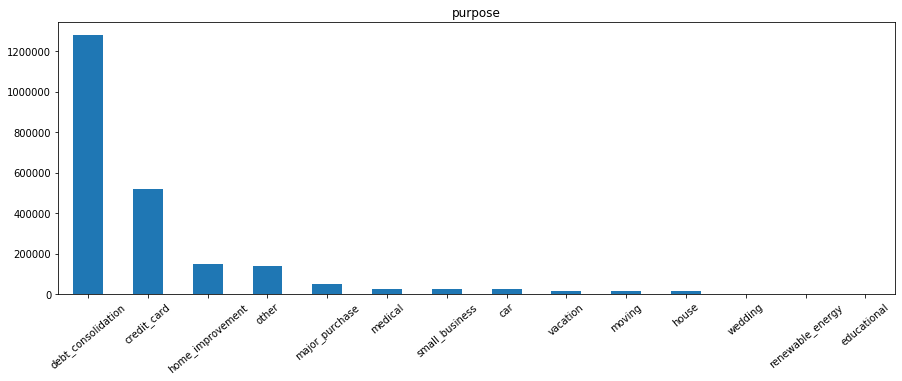

In [227]:
#finding different kinds of debts
plot.figure(figsize=(15,5))
#plot.scatter(x=purpose.index,y=purpose.values,rotation= 'vertical')
purpose.plot(kind='bar',title='purpose',rot=40)



In [232]:
# sorting according to interest rates

term=Loan_new['term']
grade=Loan_new['grade']
home=Loan_new['home_ownership']
verificatiom=Loan_new['verification_status']
loan_status=Loan_new['loan_status']
subgrade=Loan_new['sub_grade']

Loan_amount=Loan_new.groupby('term').agg({'int_rate':np.mean,'loan_amnt':np.mean},axis=1).reset_index()
Loan_amount

,term,int_rate,loan_amnt
0,36 months,11.948027,12745.526879
1,60 months,15.924292,20738.458614


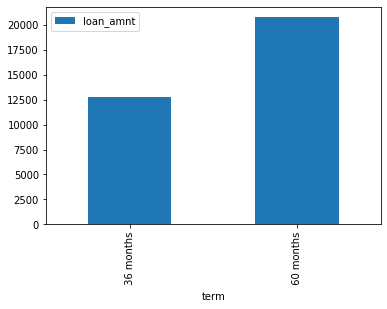

In [252]:
#Plotting loan disbursement amount
#fig, ax = plot.subplots(figsize=(8,7))
Loan_amount.plot(kind='bar',x='term',y='loan_amnt')


In [96]:
# Total number of null values
Total=np.product(Loan.shape)
missing_values= Loan_new.isnull().sum().sum()
missing_values
total_percent=(missing_values/Total)*100
total_percent

31.030798159567485

In [97]:
# finding how columns has null values

Loan_new.isnull().any().sum()

109

In [99]:
total_num=Loan_new.isnull().sum().sort_values(ascending=False)

num_of_missing=Loan_new.isnull().sum()/Loan.isnull().count()*100
num_of_missing_1=(round(num_of_missing,2).sort_values(ascending=False))
num_of_missing_1


orig_projected_additional_accrued_interest    99.63
hardship_status                               99.53
hardship_end_date                             99.53
payment_plan_start_date                       99.53
deferral_term                                 99.53
                                              ...  
emp_title                                       NaN
id                                              NaN
member_id                                       NaN
policy_code                                     NaN
url                                             NaN
Length: 145, dtype: float64

In [112]:
# remove rows with missing value
removed_rows=Loan_new.dropna()
removed_rows

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term


In [113]:
# remove columns with atleast one missing value
remove_columns=Loan_new.dropna(axis=1)
remove_columns.head()
#np.shape(remove_columns)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,verification_status,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,application_type,hardship_flag,disbursement_method,debt_settlement_flag
0,2500,2500,2500.0,36 months,13.56,84.92,C,C1,RENT,Not Verified,...,113.98,53.04,0.0,0.0,0.0,84.92,Individual,N,Cash,N
1,30000,30000,30000.0,60 months,18.94,777.23,D,D2,MORTGAGE,Source Verified,...,612.25,894.86,0.0,0.0,0.0,777.23,Individual,N,Cash,N
2,5000,5000,5000.0,36 months,17.97,180.69,D,D1,MORTGAGE,Source Verified,...,212.79,141.10,0.0,0.0,0.0,180.69,Individual,N,Cash,N
3,4000,4000,4000.0,36 months,18.94,146.51,D,D2,MORTGAGE,Source Verified,...,168.07,118.64,0.0,0.0,0.0,146.51,Individual,N,Cash,N
4,30000,30000,30000.0,60 months,16.14,731.78,C,C4,MORTGAGE,Not Verified,...,660.98,762.23,0.0,0.0,0.0,731.78,Individual,N,Cash,N


In [116]:
# filling nan values
fill_values=Loan_new.fillna(method='ffill',axis=0)
fill_values.head()


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,2500,2500,2500.0,36 months,13.56,84.92,C,C1,10+ years,RENT,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,30000,30000,30000.0,60 months,18.94,777.23,D,D2,10+ years,MORTGAGE,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,5000,5000,5000.0,36 months,17.97,180.69,D,D1,6 years,MORTGAGE,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,4000,4000,4000.0,36 months,18.94,146.51,D,D2,10+ years,MORTGAGE,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,30000,30000,30000.0,60 months,16.14,731.78,C,C4,10+ years,MORTGAGE,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
